## Descrição do Problema

O objetivo desse trabalho tem como finalidade analisar a base de dados da Loja de jogos Steam a fim de identificar se o tempo de jogo  está relacionado diretamento do o preço de comercialição, com intuito de identificar uma correção entre o preço de mercado e a avaliaçao dos usuários.

Utilizado os dados do dataset [Jogos da Steam Store]( https://www.kaggle.com/nikdavis/steam-store-games)

# Algoritmo

Foi adota como algorítimo o model K-Means devido os dados serem dispersos, não possuindo linearidade.  Ao utilizar o algoritmo poderemos criar um agrupamento de dados clusterizados e associado a um determinado centroide.

# Bibliotecas

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
%matplotlib inline     
sns.set(color_codes=True)

## Dataset

In [164]:
df = pd.read_csv('steam.csv',index_col=0, sep= ',')
df

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
appid,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99


In [165]:
df.dtypes

name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

# Tratamento dos dados

In [166]:
# Analise de valores ausentes
data =  df.replace ('?', np.NaN)

print('Número de instâncias = %d' % (data.shape[0]))
print('Número de atributos = %d' % (data.shape[1]))

print('Valores ausentes: ')
for col in data.columns:
  print('\t%s: %d' %(col, data[col].isna().sum())) 

Número de instâncias = 27075
Número de atributos = 17
Valores ausentes: 
	name: 0
	release_date: 0
	english: 0
	developer: 1
	publisher: 14
	platforms: 0
	required_age: 0
	categories: 0
	genres: 0
	steamspy_tags: 0
	achievements: 0
	positive_ratings: 0
	negative_ratings: 0
	average_playtime: 0
	median_playtime: 0
	owners: 0
	price: 0


Podemos identificar que não foi encontrado valores ausentes na base de dados utiliza, dispensado a necessidade de utilizar correções sobre Dados NaN

### Filtrando dados para Análise
Agora que obtivemos a massa de dados, identificamos que não possuem dados auxentes e conhecemos os dados exitentes, iremos selecionar os dados do qual utilizaremos para continuar com a análise, somente com os dados relevantes.

In [167]:
df = data.drop(['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 
                 'categories', 'steamspy_tags', 'achievements', 'owners'], axis=1)
df.head(5)

,name,genres,positive_ratings,negative_ratings,average_playtime,median_playtime,price
appid,,,,,,,
10,Counter-Strike,Action,124534,3339,17612,317,7.19
20,Team Fortress Classic,Action,3318,633,277,62,3.99
30,Day of Defeat,Action,3416,398,187,34,3.99
40,Deathmatch Classic,Action,1273,267,258,184,3.99
50,Half-Life: Opposing Force,Action,5250,288,624,415,3.99


### Alterando nome das colunas
Para facilitar a análise, vamos tratuzir as colunas e trazer um melhor intendimento dos atributos que iremos utilizar

In [168]:
df = df.rename(columns={"name": "Game", "genres": "Genero", "positive_ratings": "Avaliacao_Positiva", 
                        "negative_ratings": "Avalicao_Negativa", "average_playtime": "Media_tempo_de_Jogo", 
                        "median_playtime": "Mediana_Tempo_de_Jogo", "price": "Preco"})

In [202]:
df['GameID'] = df.index
df.head(5)

,Game,Genero,Avaliacao_Positiva,Avalicao_Negativa,Media_tempo_de_Jogo,Mediana_Tempo_de_Jogo,Preco,GameID
appid,,,,,,,,
10,Counter-Strike,Action,124534,3339,17612,317,7.19,10
20,Team Fortress Classic,Action,3318,633,277,62,3.99,20
30,Day of Defeat,Action,3416,398,187,34,3.99,30
40,Deathmatch Classic,Action,1273,267,258,184,3.99,40
50,Half-Life: Opposing Force,Action,5250,288,624,415,3.99,50


### Verificar colunas duplicadas

In [203]:
ldopli = df[df.duplicated()]
print("Linhas duplicadas:", ldopli.shape)

Linhas duplicadas: (0, 8)


Não foi identificado linhas duplicadas, displensando tratamento na base de dados

## Outliers

Realizaremos o processo de verificação e limpeza dos outliers

<Axes: >

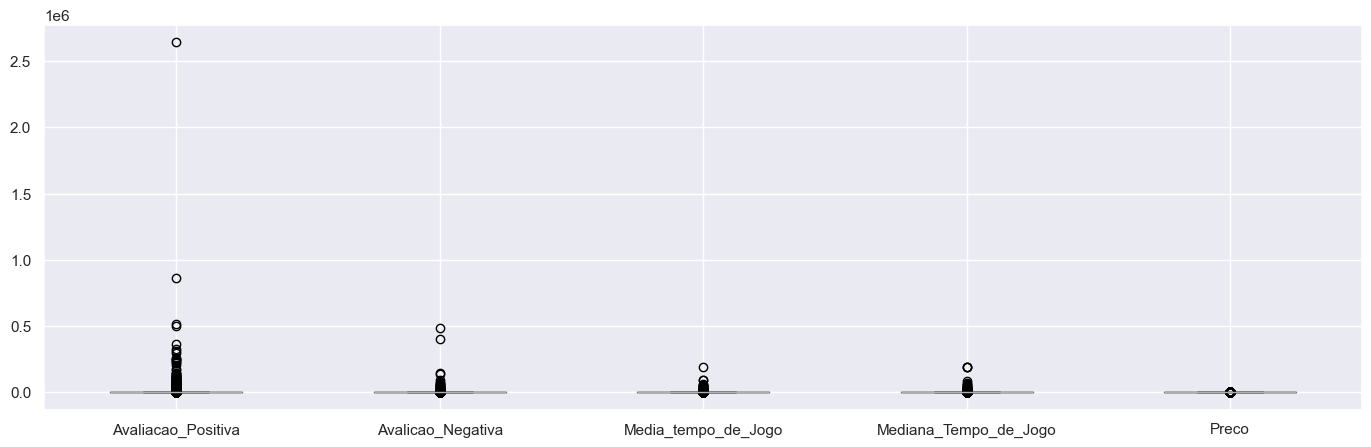

In [171]:
%matplotlib inline
df.boxplot(figsize=(17,5))

In [184]:
df_mean = df.describe()
df_mean = pd.DataFrame(df_mean)
df_mean = pd.DataFrame(df_mean.iloc[1])
df_mean = df_mean.rename(columns={"mean": "Média"})
df_mean

,Média
Avaliacao_Positiva,1000.558523
Avalicao_Negativa,211.027147
Media_tempo_de_Jogo,149.804949
Mediana_Tempo_de_Jogo,146.056030
Preco,6.078193


<Axes: xlabel='Preco'>

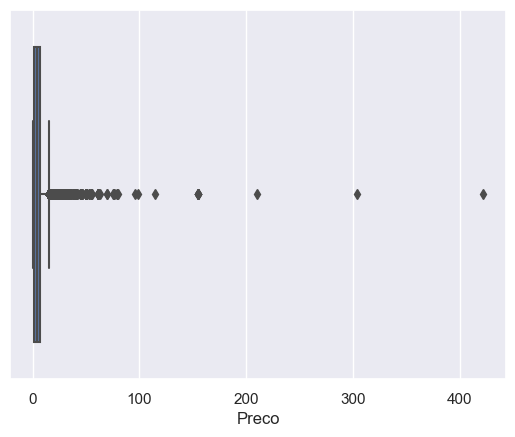

In [174]:
df2 = df
sns.boxplot(x=df2['Preco'])

In [185]:
df2 = pd.DataFrame(df.loc[:,["Avaliacao_Positiva","Avalicao_Negativa","Media_tempo_de_Jogo","Mediana_Tempo_de_Jogo","Preco"]])
df2

,Avaliacao_Positiva,Avalicao_Negativa,Media_tempo_de_Jogo,Mediana_Tempo_de_Jogo,Preco
appid,,,,,
10,124534,3339,17612,317,7.19
20,3318,633,277,62,3.99
30,3416,398,187,34,3.99
40,1273,267,258,184,3.99
50,5250,288,624,415,3.99
...,...,...,...,...,...
1065230,3,0,0,0,2.09
1065570,8,1,0,0,1.69
1065650,0,1,0,0,3.99


In [186]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avaliacao_Positiva       120.0
Avalicao_Negativa         40.0
Media_tempo_de_Jogo        0.0
Mediana_Tempo_de_Jogo      0.0
Preco                      5.5
dtype: float64


Numero de linhas antes de filtrar os Outliers: (27075, 7)
Numero de linhas depois de filtrar Outliers: (18759, 5)


<Axes: >

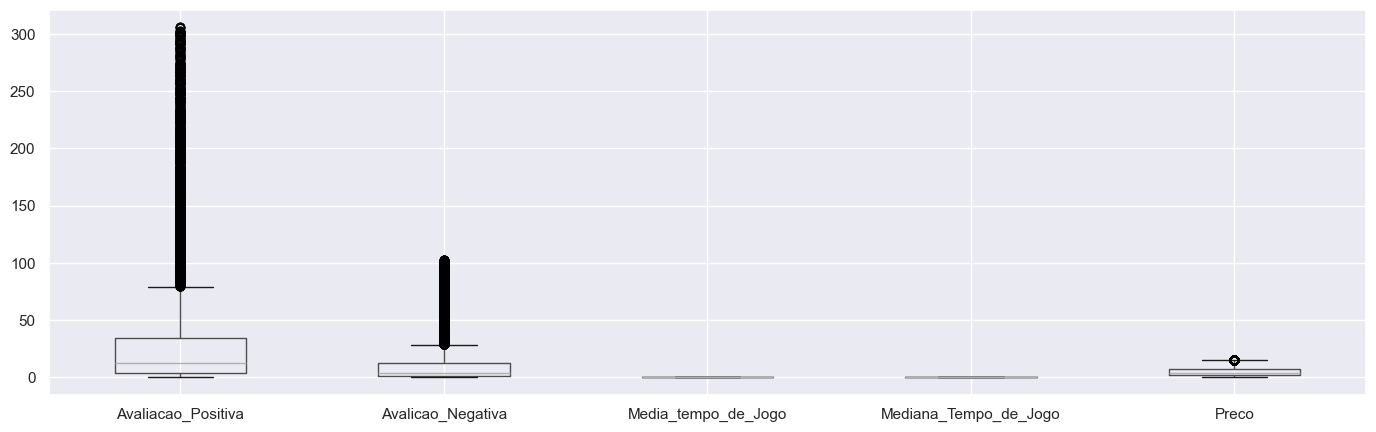

In [188]:
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Numero de linhas antes de filtrar os Outliers: {df.shape}')
print(f'Numero de linhas depois de filtrar Outliers: {df2.shape}')
%matplotlib inline
df2.boxplot(figsize=(17,5))

In [189]:
df2.mean()

Avaliacao_Positiva       30.716989
Avalicao_Negativa        10.487713
Media_tempo_de_Jogo       0.000000
Mediana_Tempo_de_Jogo     0.000000
Preco                     4.416965
dtype: float64

In [190]:
df.loc[:,["Avaliacao_Positiva","Avalicao_Negativa","Media_tempo_de_Jogo","Mediana_Tempo_de_Jogo","Preco"]].mean()

Avaliacao_Positiva       1000.558523
Avalicao_Negativa         211.027147
Media_tempo_de_Jogo       149.804949
Mediana_Tempo_de_Jogo     146.056030
Preco                       6.078193
dtype: float64

In [191]:
df3 = df.drop(df[(df.Media_tempo_de_Jogo <= 1)].index)
df3 = df3.drop(df[(df.Media_tempo_de_Jogo > 10000)].index)
df3 = df3.drop(df3[(df3.Preco > 60)].index)
df_mtj = df3.loc[df.Mediana_Tempo_de_Jogo > 1]
df_mtj

,Game,Genero,Avaliacao_Positiva,Avalicao_Negativa,Media_tempo_de_Jogo,Mediana_Tempo_de_Jogo,Preco
appid,,,,,,,
20,Team Fortress Classic,Action,3318,633,277,62,3.99
30,Day of Defeat,Action,3416,398,187,34,3.99
40,Deathmatch Classic,Action,1273,267,258,184,3.99
50,Half-Life: Opposing Force,Action,5250,288,624,415,3.99
60,Ricochet,Action,2758,684,175,10,3.99
...,...,...,...,...,...,...,...
1020340,Audica,Action;Indie;Early Access,132,34,17,17,15.49
1020820,KumaKuma Manga Editor,Animation & Modeling;Design & Illustration;Web...,346,41,43,43,4.79
1031480,東方幕華祭 春雪篇 ～ Fantastic Danmaku Festival Part II,Indie,619,19,154,154,10.29


# ANÁLISE AO REMOVER OS OUTLIERS

Identificado que ao remover os Outliers dois campos da massa de dados que necessitamos para analise foi zerada. Mediante os resultados, será usado as dados em sua forma integra. Uma vez que os Outliers, nessa situação, faz é parte relevante para analise de dados. Uma vez que a biblioteca de jogos da Steam possui em sua grande maioria jogos de pequenos desenvolvedores que possuiem tempo, peço e avaliações que fazem com que a media e mediada dos dados venham a zerar. Mediante a analise, realizaremos um processo de remoção manual dos Outliers

In [147]:
df_mtj.head(5)

,Game,Genero,Avaliacao_Positiva,Avalicao_Negativa,Media_tempo_de_Jogo,Mediana_Tempo_de_Jogo,Preco
appid,,,,,,,
20,Team Fortress Classic,Action,3318,633,277,62,3.99
30,Day of Defeat,Action,3416,398,187,34,3.99
40,Deathmatch Classic,Action,1273,267,258,184,3.99
50,Half-Life: Opposing Force,Action,5250,288,624,415,3.99
60,Ricochet,Action,2758,684,175,10,3.99


## Vamos classificaremos os vinte jogos que possuem a maior média de tempo de jogo

C:\Users\Robson\AppData\Local\Temp\ipykernel_18828\2496129833.py:7: FutureWarning: The provided callable <function sum at 0x0000020523A83240> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hours_played = df_play.groupby('Game')['Media_tempo_de_Jogo'].agg(np.sum).sort_values(ascending=False)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages

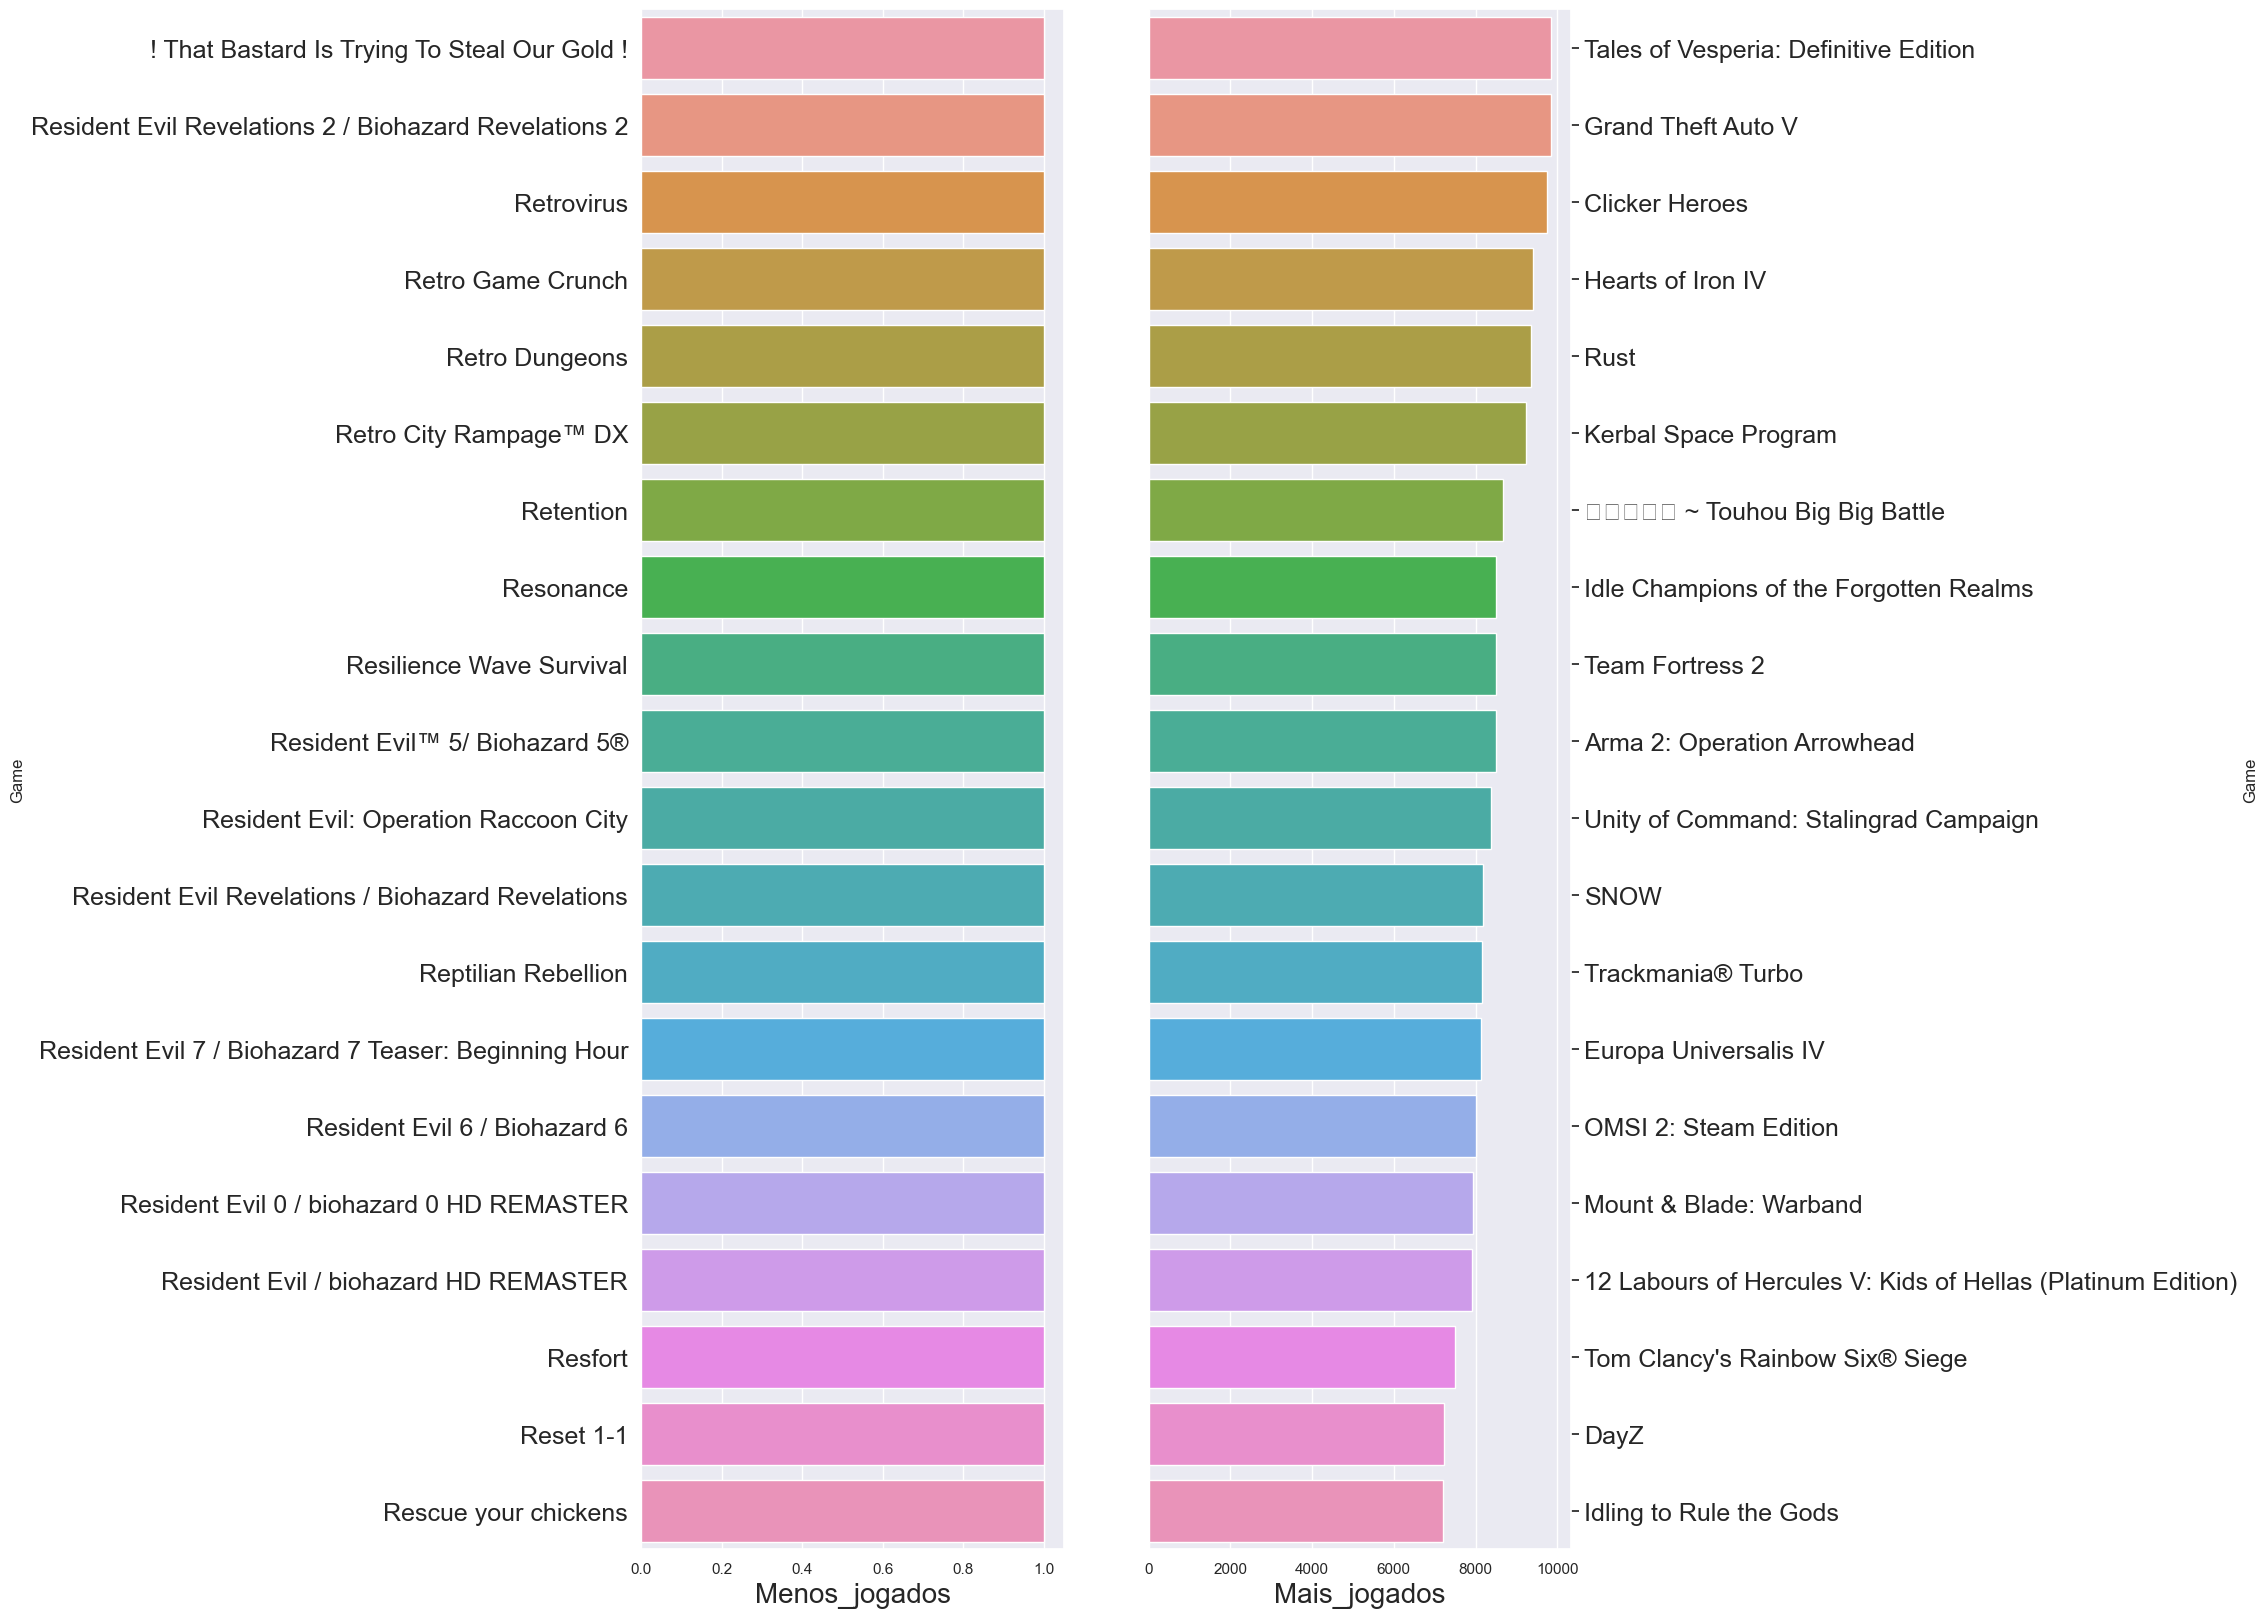

In [193]:
nb_games = 20
df_mtj2 = df_mtj.loc[df_mtj.Media_tempo_de_Jogo < 1]
play_times = df_mtj.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
play_times = pd.DataFrame({'Game': play_times.index, 'Menos_jogados': play_times.values})[0:nb_games]

df_play = df_mtj.loc[df_mtj.Media_tempo_de_Jogo > 1]
hours_played = df_play.groupby('Game')['Media_tempo_de_Jogo'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'Game': hours_played.index, 'Mais_jogados': hours_played.values})[0:nb_games]

fig, ax =plt.subplots(1,2,figsize=(12,nb_games))

sns.barplot(y = 'Game', x = 'Menos_jogados', data = play_times, ax=ax[0])
sns.barplot(y = 'Game', x = 'Mais_jogados', data = hours_played, ax=ax[1])


ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
for i in range(0,2):
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)

C:\Users\Robson\AppData\Local\Temp\ipykernel_18828\2935678030.py:2: FutureWarning: The provided callable <function sum at 0x0000020523A83240> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hours_played = df_play.groupby('Game')['Media_tempo_de_Jogo'].agg(np.sum).sort_values(ascending=False)


<Axes: xlabel='Media_tempo_de_Jogo', ylabel='Game'>

C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 19996 (\N{CJK UNIFIED IDEOGRAPH-4E1C}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25112 (\N{CJK UNIFIED IDEOGRAPH-6218}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20105 (\N{CJK UNIFIED IDEOGRAPH-4E89}) missing from current font.
  func(*args, **kwargs)
C:\Users\Robson\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19996

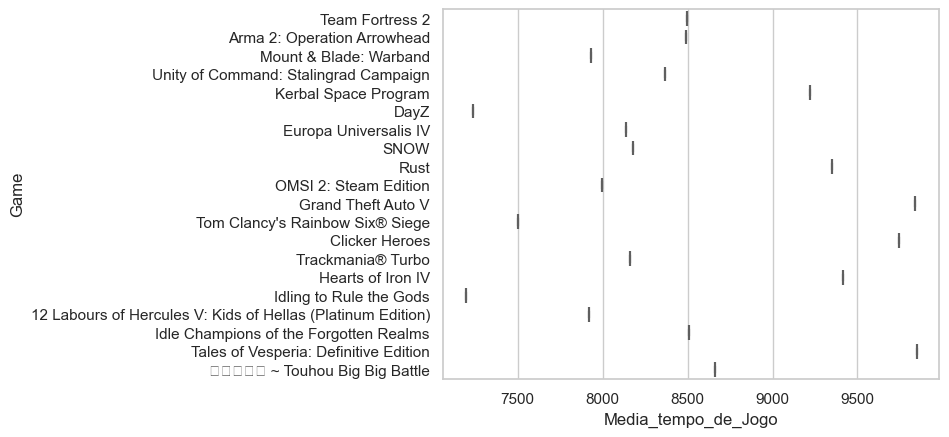

In [194]:
nb_top_games = 20
hours_played = df_play.groupby('Game')['Media_tempo_de_Jogo'].agg(np.sum).sort_values(ascending=False)
top_played_games = pd.DataFrame({'Game': hours_played.index, 'Media_tempo_de_Jogo': hours_played.values})[0:nb_top_games]

mask = df['Game'].isin(top_played_games['Game'])

df_infos_user = df.loc[mask].loc[df.Media_tempo_de_Jogo > 1][['Media_tempo_de_Jogo', 'Game']]


sns.set_style("whitegrid")
sns.boxplot(x="Media_tempo_de_Jogo", y="Game", data=df_infos_user, palette="Set3")


In [196]:
top_played_games

,Game,Media_tempo_de_Jogo
0,Tales of Vesperia: Definitive Edition,9848
1,Grand Theft Auto V,9837
2,Clicker Heroes,9742
3,Hearts of Iron IV,9413
4,Rust,9352
5,Kerbal Space Program,9223
6,东方大战争 ~ Touhou Big Big Battle,8659
7,Idle Champions of the Forgotten Realms,8508
8,Team Fortress 2,8495
9,Arma 2: Operation Arrowhead,8488


## Vamos fazer um processe de platagem para avaliar melhor nossos parámetros

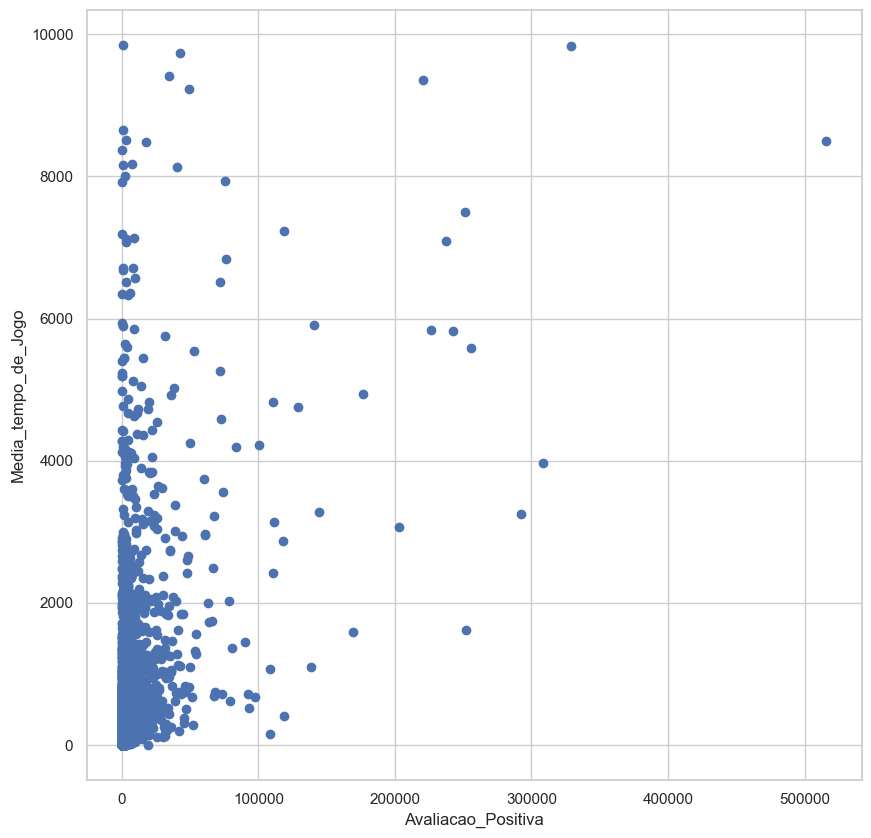

In [198]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_mtj['Avaliacao_Positiva'], df_mtj['Media_tempo_de_Jogo'])
ax.set_xlabel('Avaliacao_Positiva')
ax.set_ylabel('Media_tempo_de_Jogo')
plt.show()

Podemos identificar que avaliação não possui ligação direta com o tempo do jogo, uma vez que identificamos que os jogos que não possui maio tempo de jopo estão com avalição positiva abaixa de cem mil pontos

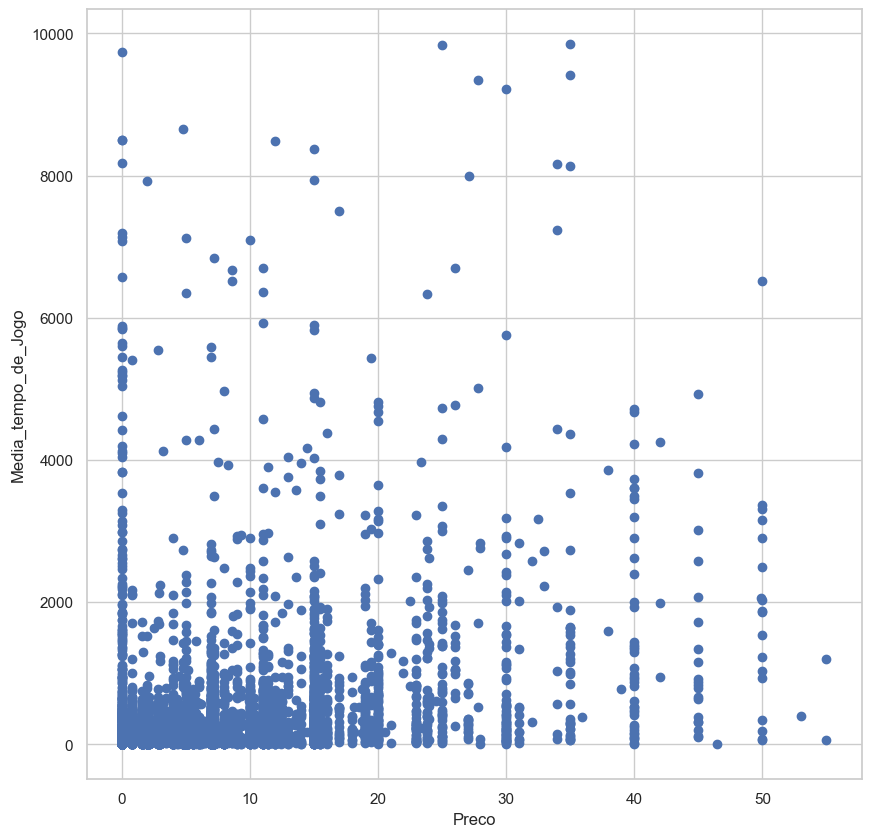

In [199]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_mtj['Preco'], df_mtj['Media_tempo_de_Jogo'])
ax.set_xlabel('Preco')
ax.set_ylabel('Media_tempo_de_Jogo')
plt.show()

### Observar-se que sem sempre o jogo que possue maioers preços são os mais jogadas. Pode dar-se por questão de disposição de aquisição ou por questão de identificão com os jogo. Os jogos que possuem maior tempo de jogo estão com custo entre £25 à £35 (libras esterlinas).

C:\Users\Robson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Robson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Robson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Robson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

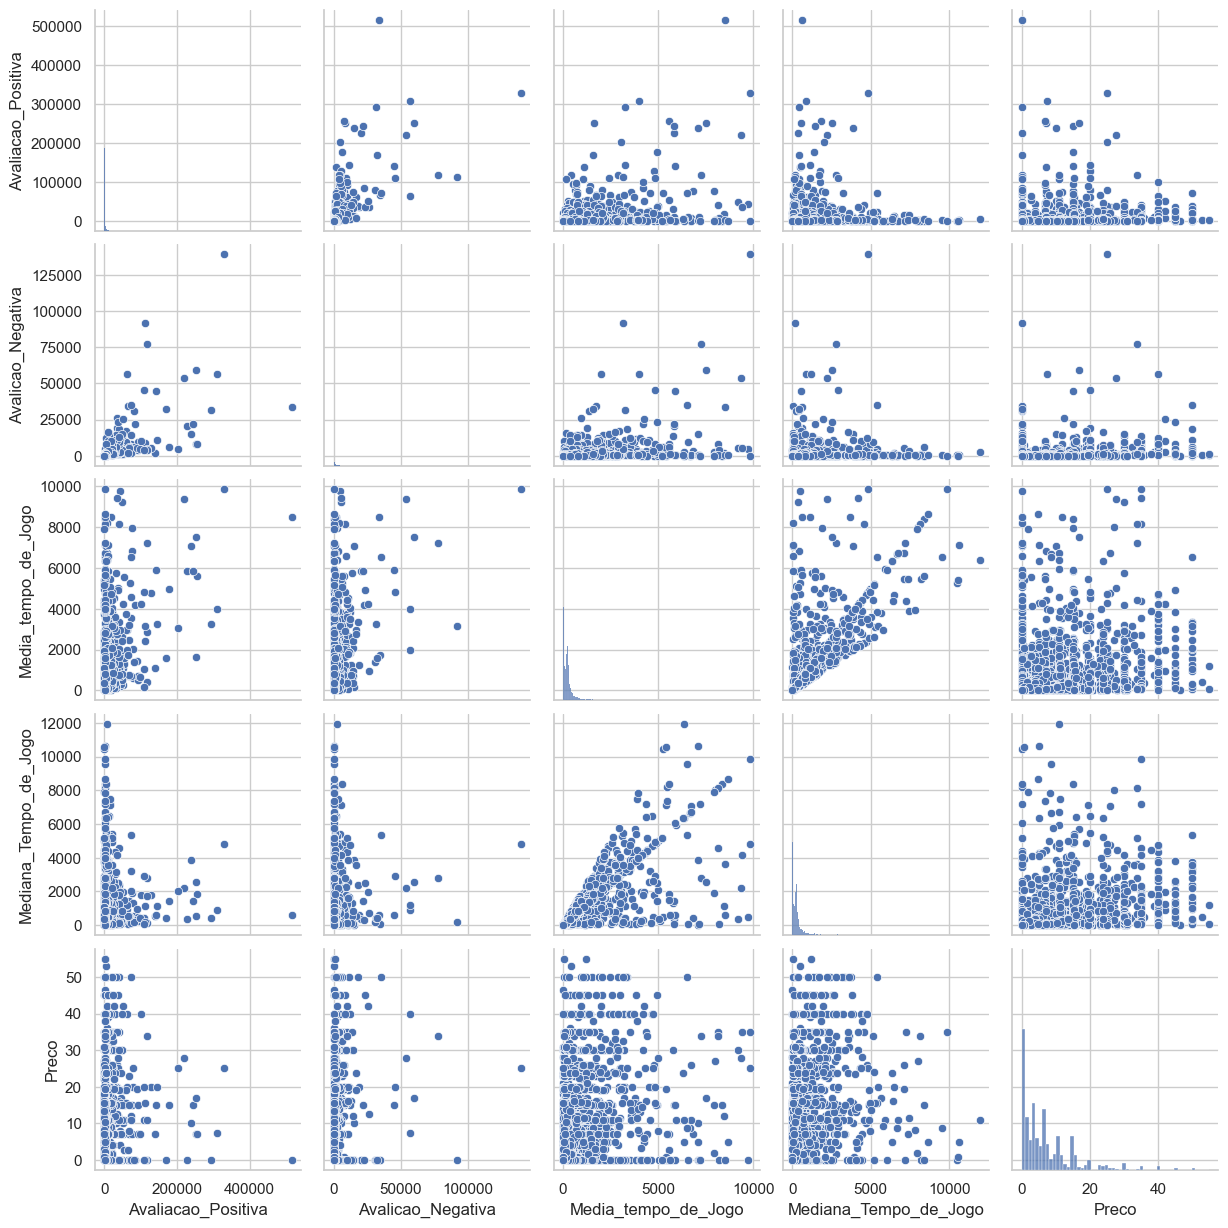

In [200]:
sns.pairplot(df_mtj)

# Criação de clusters "K Means"

In [201]:
df_kmenas =  df_mtj.drop(['Genero', 'Game'], axis=1)

In [205]:
df_kmenas.head(4)

,Avaliacao_Positiva,Avalicao_Negativa,Media_tempo_de_Jogo,Mediana_Tempo_de_Jogo,Preco
appid,,,,,
20,3318,633,277,62,3.99
30,3416,398,187,34,3.99
40,1273,267,258,184,3.99
50,5250,288,624,415,3.99


In [206]:
from sklearn import cluster

data = df_kmenas.drop('Media_tempo_de_Jogo', axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=df_kmenas.Media_tempo_de_Jogo, columns=['Media_tempo_de_Jogo'])

C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Media_tempo_de_Jogo
Media_tempo_de_Jogo,
277,0
187,0
258,0
624,0
175,0
...,...
17,0
43,0
154,0


In [207]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Avaliacao_Positiva,Avalicao_Negativa,Mediana_Tempo_de_Jogo,Preco
0,2628.634709,558.294019,414.798315,7.500740
1,194017.888889,29759.814815,1432.962963,12.962963


Observado que mesmo com uma discrepancia grande nas avaliações positivas e o tempo médio de jogo, o preço está com apenas uma diferença de 5.29 libras de difereça.

# Previsão

Utilizaremos o método do cotovelo para verificar o melhor número de clusters

C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\

Text(0, 0.5, 'SSE')

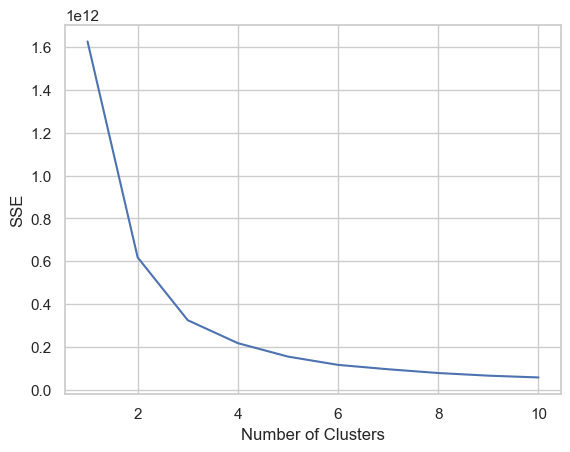

In [208]:
teste_claster =  df_mtj.drop(['Game', 'Genero'], axis=1)
numClusters = [1,2,3,4,5,6,7,8,9,10]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(teste_claster)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

A partid o momendo da que do gráfico, podemos observar que realmente o melhor utilização para os clustes consiste em 2 centroides

C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


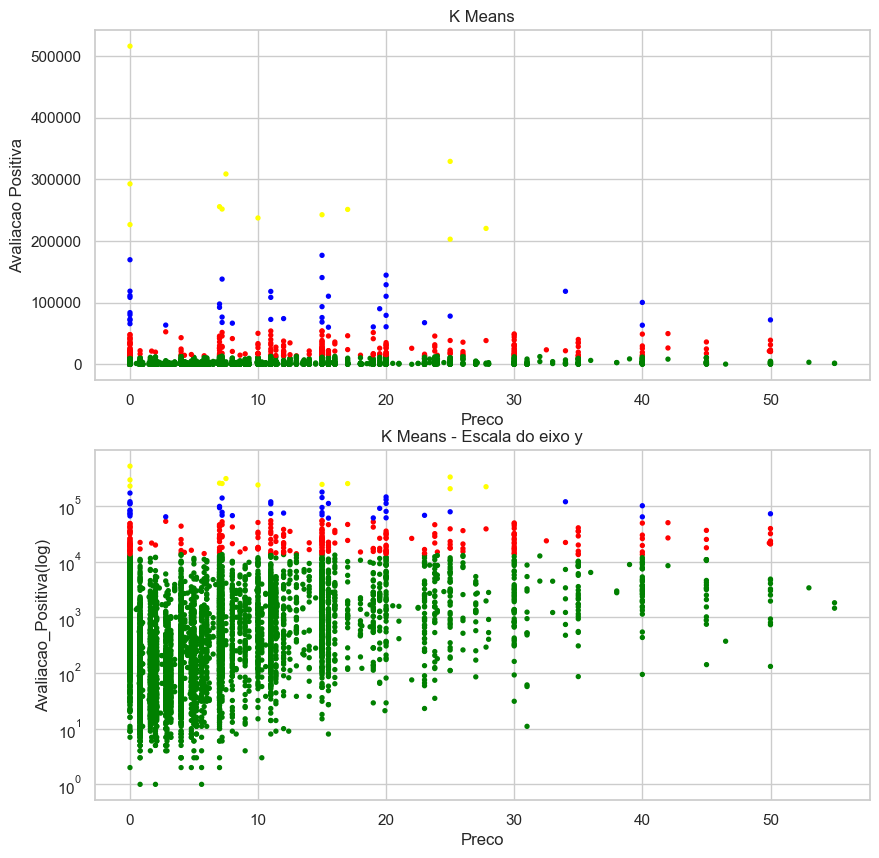

In [237]:
from sklearn.cluster import KMeans
N_CLUSTERS = 4
km = KMeans(n_clusters=N_CLUSTERS)
km.fit(teste_claster)
labels = km.labels_ # Inicia a contagem em -1
# Classificação da plotagem dos gráficos através de cores

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'blue',
                   2 : 'green',
                   3 : 'yellow',
                   4 : 'orange',
                   5 : 'pink'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in labels]


fig, ax =plt.subplots(2,1,figsize=(10,10))
ax[0].scatter(data[['Preco']], data[['Avaliacao_Positiva']], c=label_color, s=8, marker='o')
ax[0].set_xlabel('Preco')
ax[0].set_ylabel('Avaliacao Positiva')
ax[0].set_title('K Means')

ax[1].scatter(data[['Preco']], data[['Avaliacao_Positiva']], c=label_color, s=8, marker='o')
ax[1].set_xlabel('Preco')
ax[1].set_ylabel('Avaliacao_Positiva(log)')
ax[1].set_title('K Means - Escala do eixo y')
ax[1].set_yscale('log')

## Iremos realizar um segundo método para verificar os clustes e a distribuição entre os centroidos

In [219]:
from sklearn.cluster import KMeans

In [238]:
kmeans = KMeans(n_clusters=4)

In [239]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_kmenas.drop('Preco',axis=1))

In [240]:
normalized_df = normalize(scaled_df) 
normalized_df

array([[-0.01305267, -0.0197619 , -0.22237549, -0.52085416,  0.82383201],
       [-0.0055138 , -0.09484446, -0.32419004, -0.53018889,  0.77767261],
       [-0.17183607, -0.15284646, -0.2605099 , -0.36046701,  0.86562605],
       ...,
       [-0.11640806, -0.1268452 , -0.21328616, -0.21271525, -0.93788096],
       [-0.17312799, -0.18793217, -0.47876208, -0.49108466,  0.68141832],
       [-0.13831937, -0.11583945, -0.0736046 , -0.06057504, -0.97895965]])

In [241]:
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4
0,-0.013053,-0.019762,-0.222375,-0.520854,0.823832
1,-0.005514,-0.094844,-0.324190,-0.530189,0.777673
2,-0.171836,-0.152846,-0.260510,-0.360467,0.865626
3,0.146741,-0.157123,0.277718,-0.007303,0.936269
4,-0.050231,-0.002079,-0.332865,-0.552317,0.762639
...,...,...,...,...,...
5957,-0.128818,-0.117362,-0.297759,-0.305221,-0.887588
5958,-0.197888,-0.190487,-0.458632,-0.468382,0.703442
5959,-0.116408,-0.126845,-0.213286,-0.212715,-0.937881
5960,-0.173128,-0.187932,-0.478762,-0.491085,0.681418


In [242]:
kmeans.fit(normalized_df)

C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [244]:
kmeans.cluster_centers_

array([[ 0.15530082,  0.12953909,  0.38441195,  0.44332068, -0.56998737],
       [-0.19751269, -0.16896413, -0.334458  , -0.31371341,  0.80438138],
       [-0.05587905, -0.05353611, -0.15515762, -0.13476067, -0.9397212 ],
       [ 0.08477302,  0.06443392,  0.35811919,  0.31429533,  0.51332836]])

# Avalie os resultados

Exiba precisão, acurácia, f1 score, recall

Faça considerações sobre os resultados

In [245]:
def converter(cluster):
    if cluster <= 7.500740:
        return 1
    else:
        return 0

In [246]:
df_kmenas['cluster'] = df_kmenas['Preco'].apply(converter)

In [247]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_kmenas['cluster'],kmeans.labels_))
print(classification_report(df_kmenas['cluster'],kmeans.labels_))

[[ 579    0 1363    0]
 [   0 3591    0  429]
 [   0    0    0    0]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46      1942
           1       1.00      0.89      0.94      4020
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.70      5962
   macro avg       0.50      0.30      0.35      5962
weighted avg       1.00      0.70      0.79      5962



C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Robson\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
kmeans.predict

<bound method _BaseKMeans.predict of KMeans(n_clusters=4)>

In [249]:
from sklearn import metrics
metrics.adjusted_rand_score(df_kmenas['cluster'],kmeans.labels_)

0.742195129557393

Apesar de ter identificado um acurácia de 73%, do qual representa um valor relativamente bom devido ao volume de dados que foi bastante reduzido após a fase de limpeza dos dados, a coluna de Suporte apresenta uma grande discrepância ao analisar os clustes. Talvez um melhor tratamento dos dados, do qual possibilite uma melhor análise e com um maior número de clusters para treinamento possa melhorar o modelo.